# Pandas

### http://pandas.pydata.org/pandas-docs/stable/10min.html

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation

In [9]:
s = pd.Series([1, 3, 5, np.nan, 4, 2])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    4.0
5    2.0
dtype: float64

In [10]:
dates = pd.date_range('20180101', periods=6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2018-01-01,-1.117083,-1.194663,-0.772361,-0.428520
2018-01-02,-0.368059,0.299491,-0.636999,1.659585
2018-01-03,0.986909,-0.374693,0.772093,0.469903
2018-01-04,-0.882855,-0.056004,-1.862947,-0.209663
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572
2018-01-06,0.336765,0.767189,0.326280,-1.224450


# Viewing Data

In [12]:
df.head()

,A,B,C,D
2018-01-01,-1.117083,-1.194663,-0.772361,-0.428520
2018-01-02,-0.368059,0.299491,-0.636999,1.659585
2018-01-03,0.986909,-0.374693,0.772093,0.469903
2018-01-04,-0.882855,-0.056004,-1.862947,-0.209663
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572


In [13]:
df.tail(2)

,A,B,C,D
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572
2018-01-06,0.336765,0.767189,0.326280,-1.224450


In [14]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-1.11708303, -1.19466279, -0.77236101, -0.42852012],
       [-0.36805919,  0.29949087, -0.63699916,  1.65958545],
       [ 0.98690873, -0.37469252,  0.77209342,  0.46990274],
       [-0.88285494, -0.05600393, -1.86294654, -0.20966272],
       [ 0.74681588, -0.54507703, -0.80836885, -0.73557221],
       [ 0.33676538,  0.76718907,  0.32628021, -1.22444993]])

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.049585,-0.183959,-0.497050,-0.078119
std,0.870994,0.684556,0.932370,1.020426
min,-1.117083,-1.194663,-1.862947,-1.224450
25%,-0.754156,-0.502481,-0.799367,-0.658809
50%,-0.015647,-0.215348,-0.704680,-0.319091
75%,0.644303,0.210617,0.085460,0.300011
max,0.986909,0.767189,0.772093,1.659585


# Selection

## Getting

In [18]:
df['A']

2018-01-01   -1.117083
2018-01-02   -0.368059
2018-01-03    0.986909
2018-01-04   -0.882855
2018-01-05    0.746816
2018-01-06    0.336765
Freq: D, Name: A, dtype: float64

In [19]:
df[:3]

,A,B,C,D
2018-01-01,-1.117083,-1.194663,-0.772361,-0.428520
2018-01-02,-0.368059,0.299491,-0.636999,1.659585
2018-01-03,0.986909,-0.374693,0.772093,0.469903


In [20]:
df['20180101':'20180103']

,A,B,C,D
2018-01-01,-1.117083,-1.194663,-0.772361,-0.428520
2018-01-02,-0.368059,0.299491,-0.636999,1.659585
2018-01-03,0.986909,-0.374693,0.772093,0.469903


## selection by label

In [21]:
df.loc[dates[0]]

A   -1.117083
B   -1.194663
C   -0.772361
D   -0.428520
Name: 2018-01-01 00:00:00, dtype: float64

In [22]:
df.loc[:, ['A', 'B']]

,A,B
2018-01-01,-1.117083,-1.194663
2018-01-02,-0.368059,0.299491
2018-01-03,0.986909,-0.374693
2018-01-04,-0.882855,-0.056004
2018-01-05,0.746816,-0.545077
2018-01-06,0.336765,0.767189


In [23]:
df.loc['20180101':'20180103', ['A', 'B']]

,A,B
2018-01-01,-1.117083,-1.194663
2018-01-02,-0.368059,0.299491
2018-01-03,0.986909,-0.374693


In [24]:
df.loc['20180102', ['A','B']]

A   -0.368059
B    0.299491
Name: 2018-01-02 00:00:00, dtype: float64

In [25]:
# for getting scalar value
df.loc[dates[0], 'A']

-1.1170830307650896

In [26]:
# getting fast access to scalar value, same as previous
df.at[dates[0], 'A']

-1.1170830307650896

## Selection by Position

In [27]:
# select via positioin of passes index
df.iloc[3]

A   -0.882855
B   -0.056004
C   -1.862947
D   -0.209663
Name: 2018-01-04 00:00:00, dtype: float64

In [28]:
# by integer slice
df.iloc[2:3, :3]

,A,B,C
2018-01-03,0.986909,-0.374693,0.772093


In [29]:
# By list of positions
df.iloc[[1,3], [2,3]]

,C,D
2018-01-02,-0.636999,1.659585
2018-01-04,-1.862947,-0.209663


In [30]:
# for sliciing columns explicitely
df.iloc[:, 2:4]

,C,D
2018-01-01,-0.772361,-0.428520
2018-01-02,-0.636999,1.659585
2018-01-03,0.772093,0.469903
2018-01-04,-1.862947,-0.209663
2018-01-05,-0.808369,-0.735572
2018-01-06,0.326280,-1.224450


In [31]:
# for slicing rows explicitely
df.iloc[1:3, :]

,A,B,C,D
2018-01-02,-0.368059,0.299491,-0.636999,1.659585
2018-01-03,0.986909,-0.374693,0.772093,0.469903


In [32]:
# for getting value explicitely
df.iloc[1,1]

0.2994908667546879

In [33]:
# for getting value faster
df.iat[1,1]

0.2994908667546879

## Boolean Indexing

In [34]:
# using single columns value to select data
df[df.A > 0]

,A,B,C,D
2018-01-03,0.986909,-0.374693,0.772093,0.469903
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572
2018-01-06,0.336765,0.767189,0.326280,-1.224450


In [35]:
# selecting values of DF where condition met
df[df > 0]

,A,B,C,D
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,NaN,0.299491,NaN,1.659585
2018-01-03,0.986909,NaN,0.772093,0.469903
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.746816,NaN,NaN,NaN
2018-01-06,0.336765,0.767189,0.326280,NaN


## Setting

In [36]:
s1 = pd.DataFrame([1,3,4,5,6,2], index=pd.date_range('20180102', periods=6))
s1

,0
2018-01-02,1
2018-01-03,3
2018-01-04,4
2018-01-05,5
2018-01-06,6
2018-01-07,2


In [37]:
# set new columns
df['E'] = s1
df

,A,B,C,D,E
2018-01-01,-1.117083,-1.194663,-0.772361,-0.428520,NaN
2018-01-02,-0.368059,0.299491,-0.636999,1.659585,1.0
2018-01-03,0.986909,-0.374693,0.772093,0.469903,3.0
2018-01-04,-0.882855,-0.056004,-1.862947,-0.209663,4.0
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572,5.0
2018-01-06,0.336765,0.767189,0.326280,-1.224450,6.0


In [38]:
# settings value by index
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,E
2018-01-01,0.000000,-1.194663,-0.772361,-0.428520,NaN
2018-01-02,-0.368059,0.299491,-0.636999,1.659585,1.0
2018-01-03,0.986909,-0.374693,0.772093,0.469903,3.0
2018-01-04,-0.882855,-0.056004,-1.862947,-0.209663,4.0
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572,5.0
2018-01-06,0.336765,0.767189,0.326280,-1.224450,6.0


In [39]:
# setting value by position
df.iat[0,1] = 0
df

,A,B,C,D,E
2018-01-01,0.000000,0.000000,-0.772361,-0.428520,NaN
2018-01-02,-0.368059,0.299491,-0.636999,1.659585,1.0
2018-01-03,0.986909,-0.374693,0.772093,0.469903,3.0
2018-01-04,-0.882855,-0.056004,-1.862947,-0.209663,4.0
2018-01-05,0.746816,-0.545077,-0.808369,-0.735572,5.0
2018-01-06,0.336765,0.767189,0.326280,-1.224450,6.0


In [40]:
# where opeartion for stting
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,E
2018-01-01,0.000000,0.000000,-0.772361,-0.428520,NaN
2018-01-02,-0.368059,-0.299491,-0.636999,-1.659585,-1.0
2018-01-03,-0.986909,-0.374693,-0.772093,-0.469903,-3.0
2018-01-04,-0.882855,-0.056004,-1.862947,-0.209663,-4.0
2018-01-05,-0.746816,-0.545077,-0.808369,-0.735572,-5.0
2018-01-06,-0.336765,-0.767189,-0.326280,-1.224450,-6.0


## Operations

In [41]:
df.mean()

A    0.136596
B    0.015151
C   -0.497050
D   -0.078119
E    3.800000
dtype: float64

In [42]:
# on other axis
df.mean(1)

2018-01-01   -0.300220
2018-01-02    0.390804
2018-01-03    0.970842
2018-01-04    0.197706
2018-01-05    0.731560
2018-01-06    1.241157
Freq: D, dtype: float64

## Apply

In [43]:
# applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,E
2018-01-01,0.000000,0.000000,-0.772361,-0.428520,NaN
2018-01-02,-0.368059,0.299491,-1.409360,1.231065,1.0
2018-01-03,0.618850,-0.075202,-0.637267,1.700968,4.0
2018-01-04,-0.264005,-0.131206,-2.500213,1.491305,8.0
2018-01-05,0.482810,-0.676283,-3.308582,0.755733,13.0
2018-01-06,0.819576,0.090906,-2.982302,-0.468717,19.0


In [44]:
df.apply(lambda x: x.max() - x.min())

A    1.869764
B    1.312266
C    2.635040
D    2.884035
E    5.000000
dtype: float64

## Gropuping

In [45]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.998600,-1.579723
1,bar,one,1.714162,2.438703
2,foo,two,0.147462,0.022732
3,bar,three,0.151290,-0.311649
4,foo,two,-0.921284,0.053813
5,bar,two,-1.307102,-2.102980
6,foo,one,-1.372953,-0.480980
7,foo,three,-0.098448,-0.654818


In [46]:
# gruoping and the applying function sum
df.groupby('A').sum()

,C,D
A,,
bar,0.558349,0.024075
foo,-3.243822,-2.638976


In [47]:
# group on multiple columns and agin applying sum function
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.714162  2.438703
    three  0.151290 -0.311649
    two   -1.307102 -2.102980
foo one   -2.371553 -2.060703
    three -0.098448 -0.654818
    two   -0.773821  0.076545

# Reshaping

## Stack

In [50]:
tuples = list(zip(*['bar bar baz baz foo foo qux qux'.split(), 'one two one two one two one two'.split()]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.166355 -0.359267
      two     1.165741 -0.499431
baz   one    -0.815766  0.157379
      two     0.055994  0.239763

In [51]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.166355
               B   -0.359267
       two     A    1.165741
               B   -0.499431
baz    one     A   -0.815766
               B    0.157379
       two     A    0.055994
               B    0.239763
dtype: float64

In [52]:
stacked.unstack()

A         B
first second                    
bar   one     0.166355 -0.359267
      two     1.165741 -0.499431
baz   one    -0.815766  0.157379
      two     0.055994  0.239763

In [53]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.166355 -0.815766
       B -0.359267  0.157379
two    A  1.165741  0.055994
       B -0.499431  0.239763

# Plotting

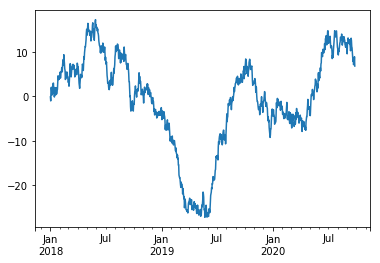

In [55]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20180101', periods=1000))
ts = ts.cumsum()
ts.plot()

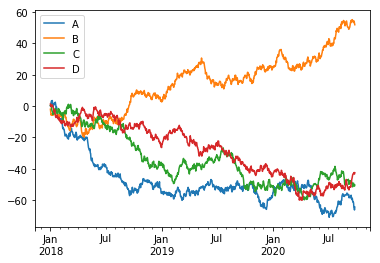

In [60]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()